#  Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
C:\Users\LENOVO\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Load CSV file

In [2]:
df=pd.read_csv(r"C:\Users\LENOVO\Downloads\tips.csv")

Explore first 5 rows of the data


In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


# Intuitions

Show the 5 number summary of the data and its standard deviation with count and show that:
The mean and median are close and data has symmetric distribution.
The bills are around 18.6$.
The size of the party are between 2 and 3

In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


__________________

In [6]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

The data doesn't have any null values

Dropping the duplicates

In [7]:
df.drop_duplicates(inplace=True)

_______

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22096\825204515.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sex_counts.index, y=sex_counts.values, palette="viridis")


<Axes: xlabel='sex'>

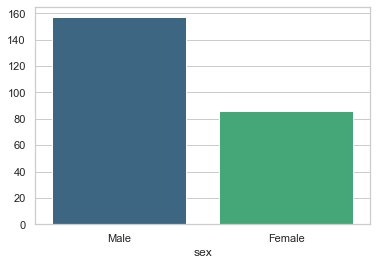

In [8]:
sns.set_theme(style="whitegrid", palette="pastel")
sex_counts = df['sex'].value_counts()
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette="viridis")


# Intuitions

This chart is used to show the distribution of males and females. And it shows that the majority of the customers are males

In [9]:
df.groupby("sex")['total_bill'].mean()

sex
Female    18.115698
Male      20.744076
Name: total_bill, dtype: float64

# Intuitions

We showed the mean of total bills per gender to know which gender are paying more bills 
We could used (sum) instead of mean but mean is more helpful to get intuition about that.
The sum doesn't make sense as the number of males are more than females

In [10]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    61
Fri     19
Name: count, dtype: int64

This is used to know which days are more likely to visit the restaurant at. 
And it shows that they are more likely to visit at ( Saturday and Sunday) , The Weekend days in Europe

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22096\2603528962.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='total_bill', data=day_totals, palette="mako")


<Axes: xlabel='day', ylabel='total_bill'>

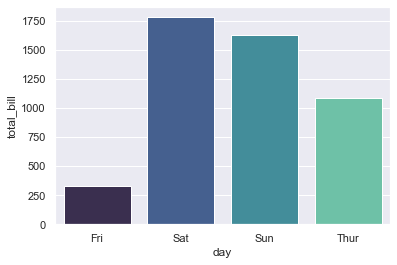

In [11]:
sns.set_theme(style="darkgrid", palette="mako")
day_totals = df.groupby('day')['total_bill'].sum().reset_index()
sns.barplot(x='day', y='total_bill', data=day_totals, palette="mako")


This chart shows that the restaurant get the majority of the bills in Saturday and Sunday ( Weekend days) more than any other day.
And Friday is the least day to get bills at
We could use Pie chart to show this information but barchart is more better to show the total bills

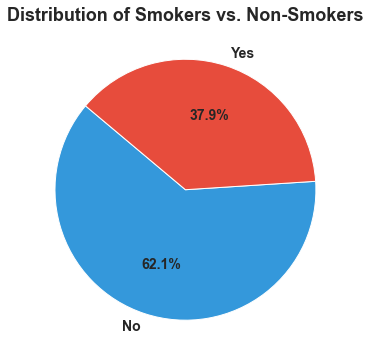

In [12]:
smoker_counts = df['smoker'].value_counts()
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(8, 6))
colors = ['#3498db', '#e74c3c']
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', colors=colors, startangle=140, textprops={'fontsize': 14, 'weight': 'bold'})

plt.title('Distribution of Smokers vs. Non-Smokers', fontsize=18, weight='bold')

plt.show()

This chart is  used to show the distribution of smokers and non smokers and it shows that the majority of visitors are non-smokers
We could use barchart but piechart makes more sense as we have just 2 variables to compare

____________________________

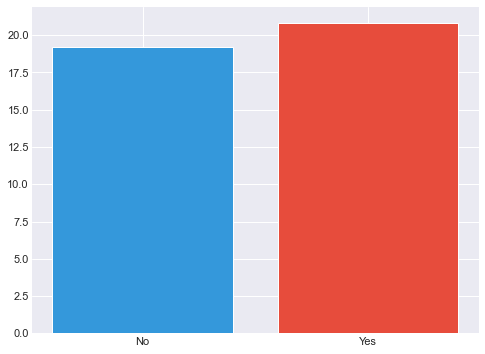

In [13]:
smoker_totals = df.groupby('smoker')['total_bill'].mean().reset_index()
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(8, 6))
bars = plt.bar(smoker_totals['smoker'], smoker_totals['total_bill'], color=['#3498db', '#e74c3c'])



This chart shows that smokers pays more bills than non-smokers. As the values haven't that big difference so barchart was suitable to show this small difference more than the piechart

Text(0, 0.5, 'Average Tip')

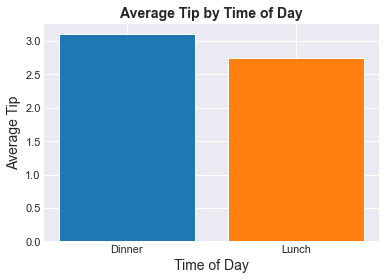

In [14]:
time_tips = df.groupby('time')['tip'].mean().reset_index()
plt.style.use('seaborn-darkgrid')
bars = plt.bar(time_tips['time'], time_tips['tip'], color=['#1f77b4', '#ff7f0e'])
plt.title('Average Tip by Time of Day', fontsize=14, weight='bold')
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Average Tip', fontsize=14)


Here we could see that at the dinner time , the visitors pay more tips than at lunch time
we choose the average instead of sum to know for each person will he more likely to pay tips at the lunch or dinner. So average makes more sense than using the Sum.

______

Text(0, 0.5, 'Average bill')

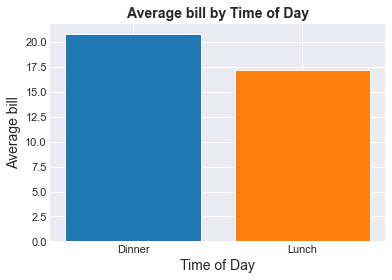

In [15]:
time_bill = df.groupby('time')['total_bill'].mean().reset_index()
plt.style.use('seaborn-darkgrid')
bars = plt.bar(time_tips['time'], time_bill['total_bill'], color=['#1f77b4', '#ff7f0e'])
plt.title('Average bill by Time of Day', fontsize=14, weight='bold')
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Average bill', fontsize=14)


This chart has the same conclusion as the last one but for the BILLS not tips. 
And add this point we could make an assumption that the smoker visitor will pay more tips and bills more at dinner in weekend days. And they are the most attracted type of visitors for the restaurant.

__________

Text(0, 0.5, 'Average Tip')

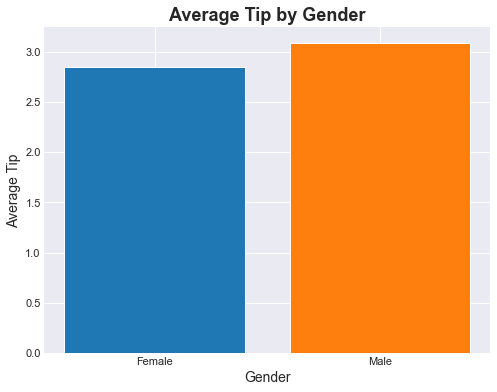

In [16]:
sex_tips = df.groupby('sex')['tip'].mean().reset_index()

plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(8, 6))
bars = plt.bar(sex_tips['sex'], sex_tips['tip'], color=['#1f77b4', '#ff7f0e'])

plt.title('Average Tip by Gender', fontsize=18, weight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Average Tip', fontsize=14)

We wanted to know which gender paying more tips than the other. Barchart was suitable as the difference between the two variables not that big.

________________

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22096\1778061212.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sex', y='total_bill', data=df, estimator=np.mean, ci=None)


Text(0, 0.5, 'Mean Total Bill')

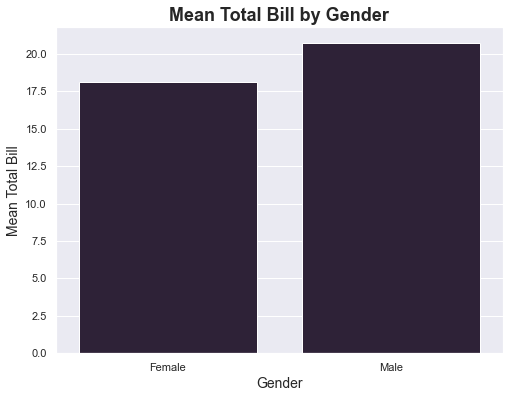

In [17]:
sns.set_theme(style="darkgrid", palette="mako")

plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='total_bill', data=df, estimator=np.mean, ci=None)

plt.title('Mean Total Bill by Gender', fontsize=18, weight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Mean Total Bill', fontsize=14)

This chart shows the same thing like the latest but for the tips.
And we can add more assumption that the Smoker-Male will be more attractive for the restaurant than the Female

Text(0, 0.5, 'Count')

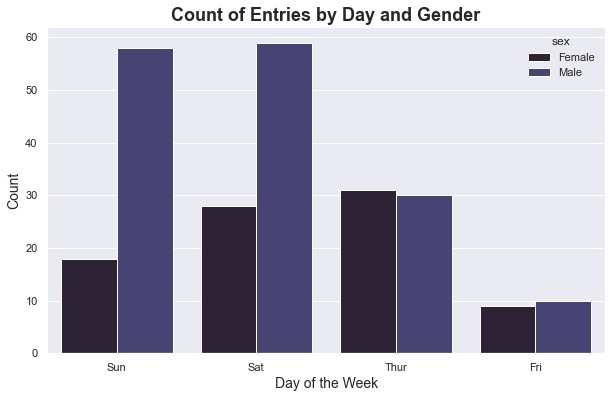

In [18]:
sns.set_theme(style="darkgrid", palette="mako")

plt.figure(figsize=(10, 6))
sns.countplot(x='day', hue='sex', data=df)

plt.title('Count of Entries by Day and Gender', fontsize=18, weight='bold')
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Count', fontsize=14)

This chart shows the number of visitors between males and females per days.
The difference of number of females doesn't differ like the number of men between weekend days and other days. There are big difference
Also the number of males in general are more than females.
We could use Bubble chart but it won't let us compare the days agains males and females. It will need 3 variables to compare not just 2 variables (days and gender)

Text(0, 0.5, 'Count')

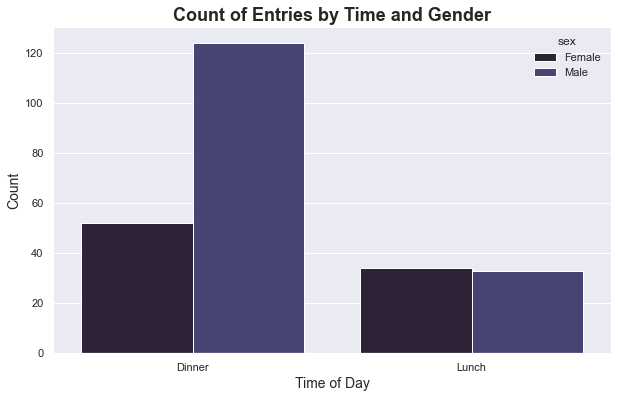

In [19]:
sns.set_theme(style="darkgrid", palette="mako")

plt.figure(figsize=(10, 6))
sns.countplot(x='time', hue='sex', data=df)

plt.title('Count of Entries by Time and Gender', fontsize=18, weight='bold')
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Count', fontsize=14)

This shows that the males are more likely to go on dinner more than lunch. While females are more likely to go on a dinner but with a small difference between dinner and lunch. Bubble chart won't be enough here as we have just one numeric value (Count)

_________________

Text(0, 0.5, 'Tip')

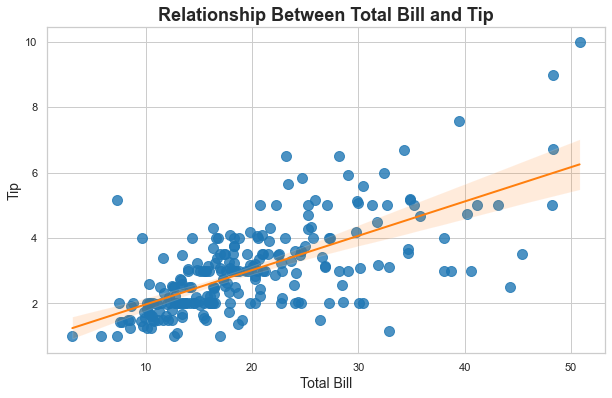

In [20]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.regplot(x='total_bill', y='tip', data=df, scatter_kws={'color': '#1f77b4', 's': 100}, line_kws={'color': '#ff7f0e', 'linewidth': 2})

plt.title('Relationship Between Total Bill and Tip', fontsize=18, weight='bold')
plt.xlabel('Total Bill', fontsize=14)
plt.ylabel('Tip', fontsize=14)


The scatter plot show that there is a direct relation between total bill and tips.
Alternate charts : Line Chart
Scatter plots are used instead of line charts in certain contexts because they are better suited for visualizing relationships between two variables, especially when both variables are continuous

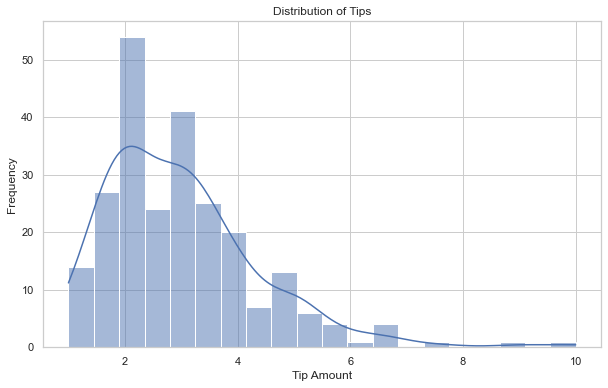

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['tip'], kde=True, bins=20)
plt.title('Distribution of Tips')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')
plt.show()

The chart shows that the tip amount are more likely to be around 2$ more than paying other tip amount

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22096\354672454.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=average_bill_by_size, x='size', y='total_bill', palette='viridis')


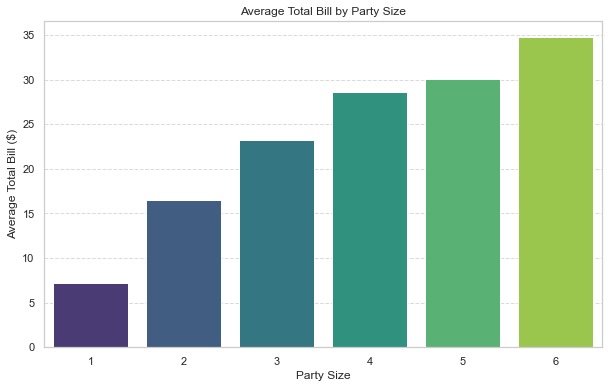

In [22]:
average_bill_by_size = df.groupby('size')['total_bill'].mean().reset_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=average_bill_by_size, x='size', y='total_bill', palette='viridis')

plt.title('Average Total Bill by Party Size')
plt.xlabel('Party Size')
plt.ylabel('Average Total Bill ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

It shows That the bigger party size. The more total bill be spent. and it makes sense for us

________________________

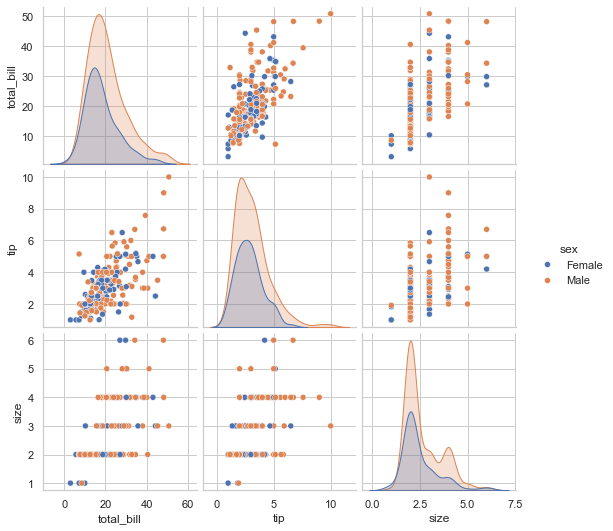

In [23]:
sns.pairplot(df, hue = 'sex')


# Intuitions


Total Bills and Size are Right Skewed

Tips and  Total Bills have direct relation

Males pays more total bills and tips


______________________

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22096\1859711782.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_bill'])


<Axes: xlabel='total_bill', ylabel='Density'>

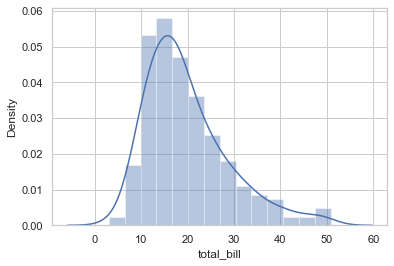

In [25]:
sns.distplot(df['total_bill'])


- Most of total bills are between 10-20$


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22096\2931073468.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['size'])


<Axes: xlabel='size', ylabel='Density'>

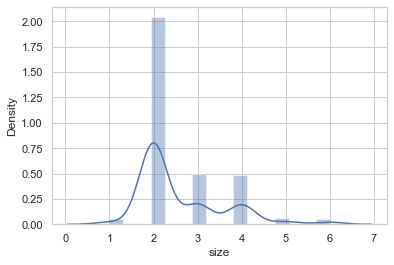

In [26]:
sns.distplot(df['size'])


- Most of parties are consisting of 2 persons

______________________

#  A/B Testing

This test is conduted to know if Smokers situation is affecting pay a tip or no

In [28]:
import scipy.stats as stats

smokers = df[df['smoker'] == 'Yes']['tip']
non_smokers = df[df['smoker'] == 'No']['tip']

t_stat, p_value = stats.ttest_ind(smokers, non_smokers)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

T-statistic: 0.15156585951381893
P-value: 0.8796561596489987


Based on the results of the A/B test:

Interpretation
T-statistic: The t-statistic value is quite close to zero, indicating that the difference in means between the two groups (smokers and non-smokers) is very small relative to the variation within the groups.

P-value: The p-value is 0.927, which is much greater than the common significance level of 0.05.

Conclusion
Since the p-value is significantly higher than 0.05, you fail to reject the null hypothesis. This means that there is no statistically significant difference in tip amounts between smokers and non-smokers in this dataset.

In summary: Based on the A/B test results, there is no evidence to suggest that smoking status affects the tip amount significantly.

___________________

# Preprocessing

The Following box plots are showing the distributions of the Numerical Columns

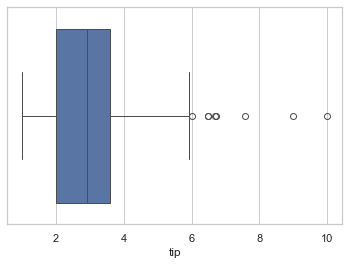

In [29]:
sns.boxplot(data=df,x='tip')
plt.show()

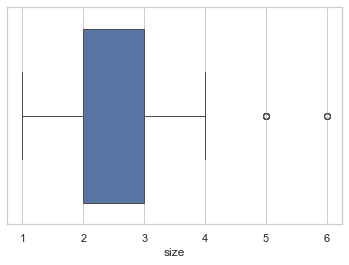

In [30]:
sns.boxplot(data=df,x='size')
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['standard_tip'] = scaler.fit_transform(df[['tip']])

Standard Scaler is used to normalize the data of tip column to remove the extreme values

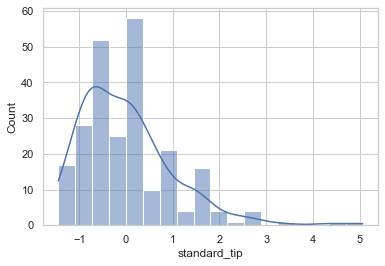

In [32]:
sns.histplot(df,x='standard_tip',kde=True)
plt.show()

The value (3) is chosen because the 3 or greater are rare to be tipped by the user so they represents outliers for the data

In [33]:
outliers = df[np.abs(df['standard_tip'])>3]
outliers

,total_bill,tip,sex,smoker,day,time,size,standard_tip
23,39.42,7.58,Male,No,Sat,Dinner,4,3.311953
170,50.81,10.00,Male,Yes,Sat,Dinner,3,5.062849
212,48.33,9.00,Male,No,Sat,Dinner,4,4.339338


In [34]:
no_outlier=df[np.abs(df['standard_tip'])<=3]

In [35]:
data=no_outlier.drop(columns=['standard_tip'])


We're going to remove the outliers using IQR range method

In [36]:
Q1=np.percentile(data['tip'],25)
Q3=np.percentile(data['tip'],75)
IQR=Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [37]:
data=data[~((data['tip']<lower_bound) | (data['tip']>upper_bound))]

<Axes: xlabel='tip'>

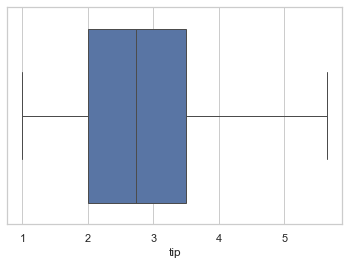

In [38]:
sns.boxplot(data=data,x='tip')


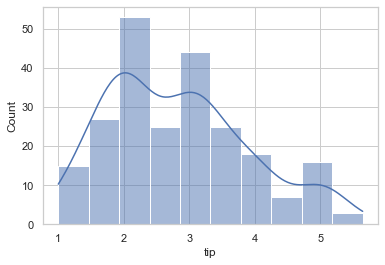

In [39]:
sns.histplot(data,x='tip',kde=True)
plt.show()

_______________________________

The following are the same to remove the outliers of Size column as 5,6 values represents outliers for me as shown in the previous 'Size' boxplot in line 30

In [40]:
filtered = data[data['size']>=5]
filtered

,total_bill,tip,sex,smoker,day,time,size
125,29.80,4.20,Female,No,Thur,Lunch,6
142,41.19,5.00,Male,No,Thur,Lunch,5
143,27.05,5.00,Female,No,Thur,Lunch,6
155,29.85,5.14,Female,No,Sun,Dinner,5
156,48.17,5.00,Male,No,Sun,Dinner,6
185,20.69,5.00,Male,No,Sun,Dinner,5
187,30.46,2.00,Male,Yes,Sun,Dinner,5
216,28.15,3.00,Male,Yes,Sat,Dinner,5


In [41]:
df = data[data['size'] < 5]


In [42]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


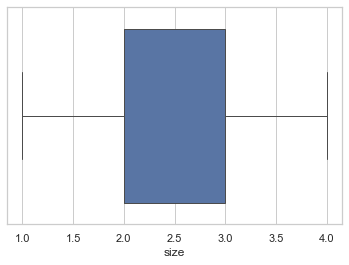

In [43]:
sns.boxplot(data=df,x='size')
plt.show()

# Label Encoding

We're going to use label encoder to convert the catgorical columns into Numerical columns to be ready for the ML model
We could use One hot encoder but for the curse of dimensions we will try label encoder.
- It might cause problems as the model will treat this numerical values as weights. So for Gender (0,1) will consider 1 better than 0. But it's just Male and female. So it's one of problems we may face.

In [44]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['day'] = label_encoder.fit_transform(df['day'])
df['time'] = label_encoder.fit_transform(df['time'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22096\2882827652.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = label_encoder.fit_transform(df['sex'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22096\2882827652.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoker'] = label_encoder.fit_transform(df['smoker'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22096\2882827652.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [45]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4
...,...,...,...,...,...,...,...
238,35.83,4.67,0,0,1,0,3
240,27.18,2.00,0,1,1,0,2
241,22.67,2.00,1,1,1,0,2
242,17.82,1.75,1,0,1,0,2


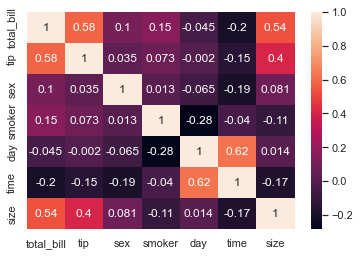

In [46]:
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

The correlation matrix shows the correlation between columns. and there is no columns that has a strong relation (>0.7) between each other

In [47]:
corr

,total_bill,tip,sex,smoker,day,time,size
total_bill,1.000000,0.578635,0.104023,0.154735,-0.045383,-0.204182,0.537188
tip,0.578635,1.000000,0.034533,0.072882,-0.001993,-0.145649,0.404653
sex,0.104023,0.034533,1.000000,0.013401,-0.065440,-0.194380,0.081434
smoker,0.154735,0.072882,0.013401,1.000000,-0.284620,-0.040308,-0.106135
day,-0.045383,-0.001993,-0.065440,-0.284620,1.000000,0.620781,0.013848
time,-0.204182,-0.145649,-0.194380,-0.040308,0.620781,1.000000,-0.174555
size,0.537188,0.404653,0.081434,-0.106135,0.013848,-0.174555,1.000000


# Linear Regression Model

- Importing Train test split to split the data.
- MSE and R2 to evaluate the model

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


- Seperate the data to independent columns (x) and the target (Y= total bills)

In [49]:
X=df.drop(columns=['total_bill'])
y=df['total_bill']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [50]:
model = LinearRegression()


Train The model

In [51]:
model.fit(X_train,y_train)

LinearRegression()

Make Predictions

In [52]:
y_pred = model.predict(X_test)

In [53]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 39.75222242273727
R-squared: 0.309406631511592


The results shown aren't that good for us as the MSE is high and R-Square are low. It might done due to the Label Encoder approach used so we have to try another way like One Hot encoder

# Conclusion

- Most of Visitors of the restaurant are Men.
- Smokers spent more tips.
- Dinner has more visitors with more paid bills and tips.
- Weekend days are more buse for the restaurant


# Advices

- The restaurant should specify an Smoking-Area facilitate the visiting of smokers.
- Also they can add some sales in non-weekend days to attract visitors.
- The restaurant can launch a campaign to attract more women as the majority of visitors are men